In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# Define link lengths for 6 DoF
a1, a2, a3, a4, a5, a6 = (0.0, 0.0, 0.07, 0.07, 0.07, 0.0)
a2

0.0

In [130]:
def dh_transformation_matrix(theta, a,d, alpha):
    cos_theta, cos_alpha = np.cos(theta), np.cos(alpha)
    sine_theta, sine_alpha = np.sin(theta), np.sin(alpha)

    matrix = np.array(
        [
            [cos_theta, -sine_theta*cos_alpha, sine_theta*sine_alpha, a*cos_theta],
            [sine_theta, cos_theta*cos_alpha, -cos_theta*sine_alpha, a*sine_theta],
            [0, sine_alpha, cos_alpha, d],
            [0, 0, 0, 1]
        ]
    )

    return matrix

In [131]:
def forward_kinematics(thetas):
    T1 = dh_transformation_matrix(thetas[0], a1, 0, 90)
    T2 = dh_transformation_matrix(thetas[1], a2, 0, 0)
    T3 = dh_transformation_matrix(thetas[2], a3, 0, 0)
    T4 = dh_transformation_matrix(thetas[3], a4, 0, 90)
    T5 = dh_transformation_matrix(thetas[4], a5, 0, 0)
    T6 = dh_transformation_matrix(thetas[5], a6, 0, -90)

    T_final = T1 @ T2 @ T3 @ T4 @ T5 @ T6
    
    return T_final

In [132]:
# !pip install ikpy

In [157]:
from ikpy.chain import Chain

arm_chain = Chain.from_urdf_file("robot.urdf")

target_position = [0.1, 0.1, 0.1]

joint_angles = arm_chain.inverse_kinematics(target_position)

print("Joint angles:", joint_angles)

print("End-effector pose:")
print(arm_chain.forward_kinematics(joint_angles))


Joint angles: [ 0.            0.785364312   2.1862780025 -0.7853971585  1.570859075
  0.            0.          ]
End-effector pose:
[[-0.707087786  -0.119533324   0.69694953    0.0975693002]
 [-0.0000650631 -0.9855979997 -0.1691052297  0.0975692736]
 [ 0.7071257729 -0.1196175882  0.6968965303  0.0975692647]
 [ 0.            0.            0.            1.          ]]


In [159]:
np.set_printoptions(suppress=True, precision=10)
fk_ikpy = arm_chain.forward_kinematics(joint_angles)
thetas = list(joint_angles)
print(forward_kinematics(thetas))
print(fk_ikpy)

[[ 0.3658947891 -0.9112566777  0.189029814  -0.0837916404]
 [-0.9151166073 -0.3153230683  0.2512627262 -0.0949731571]
 [-0.1693593761 -0.2649200443 -0.9492811869  0.0498264536]
 [ 0.            0.            0.            1.          ]]
[[-0.707087786  -0.119533324   0.69694953    0.0975693002]
 [-0.0000650631 -0.9855979997 -0.1691052297  0.0975692736]
 [ 0.7071257729 -0.1196175882  0.6968965303  0.0975692647]
 [ 0.            0.            0.            1.          ]]


In [161]:
x = fk_ikpy[0, 3]
y = fk_ikpy[1, 3]
z = fk_ikpy[2, 3]
x, y, z

(0.09756930019950126, 0.09756927362172507, 0.09756926465322831)

In [163]:
print(np.degrees(joint_angles)) 

[  0.            44.9980604605 125.2645023856 -44.9999424237
  90.0035952059   0.             0.          ]


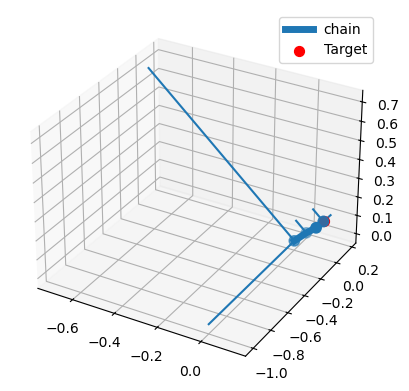

In [165]:
from ikpy.utils import plot as ikpy_plot
import matplotlib.pyplot as plt

calculated_angles = arm_chain.inverse_kinematics(target_position)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arm_chain.plot(calculated_angles, ax)
ax.scatter(*target_position, color='red', s=50, label='Target')
#ax.scatter(0, 0, 0, color='green', s=50, label='Base')

ax.legend()
plt.show()

